# TP3   Application de l'algorithme génétique  pour la sélection des caractéristiques: Evolutionary feature selection

La réduction de dimension est une étape importante en apprentissage automatique. Elle a pour objectif de remplacer un ensemble de caractéristiques de taille importante par un ensemble de taille réduite. La réduction de dimension permet d’améliorer les performances des modèles et d’accélérer le temps d’apprentissage. La réduction de dimension peut se faire principalement par deux méthodes :

Sélection des caractéristiques (feature selection): elle prend en entrée un ensemble de caractéristiques de départ et elle fournit en sortie un sous-ensemble de taille réduite qui contient seulement les caractéristiques pertinentes et non redondantes.
    
Extraction des caractéristiques (feature extraction): elle consiste à transformer l'espace des caractéristiques de départ en un espace de dimension réduite qui contient le maximum d’informations sur les données.
    
Parmi les méthodes de sélection des caractéristiques, on trouve :

- Les méthodes filtres : A partir d’un ensemble de N caractéristiques, on mesure pour chaque caractéristique son degré
de pertinence ou de contribution dans le modèle.Les K caractéristiques les plus pertinentes sont ainsi sélectionnées.  
- Les méthodes wrapper :  A partir d’un ensemble de N caractéristiques, différents sous-ensembles de caractéristiques sont évalués par un algorithme d'apprentissage automatique. L’objectif est de trouver le meilleur sous-ensemble de caractéristiques qui maximise les performances du modèle. Les sous-ensembles de caractéristiques sont trouvés par différentes méthodes telle que la recherche exhaustive.

Les méthodes wrapper sont plus perfomantes que les méthodes filtres mais possédent un coût computationnel élevé.

Dans ce TP, nous allons utiliser les AG pour trouver le sous-ensemble de caractéristiques qui maximise les performances du modèle de classification MLP selon la méthode wrapper.


## 1. Dataset Iris

Le jeu de données Iris est constitué de trois classes de la fleur Iris. Il contient 150 instances telle que chacune d'elles est composée de quatre attributs pour représenter une fleur d’Iris. Chaque donnée du jeu de données Iris est étiquetée par une classe de fleur.  


In [2]:
#import des librairies
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import datasets


# Import libraries  pour la classification

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score


C:\Users\User\AppData\Local\Temp\ipykernel_3536\4119098403.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Charger le jeu de données Iris
iris = datasets.load_iris()
target = datasets.load_iris().target

# Convertir Iris Dataset au pandas dataframe
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['Target'] = iris.target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### vérifier l'existance des valeurs NaN

In [5]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

aucune valeur NaN, donc on ne fait aucun prétraitement

In [6]:
# visualiser la matrice de corrélation entre les features
pd.plotting.scatter_matrix(iris_data, c=df_iris['Target'])
plt.show()

NameError: name 'iris_data' is not defined

La matrice de correlation permet de voir le degré de corrélation entre les features du dataset Iris.

In [7]:
cor = iris_data.corr()
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.figure(figsize=(8,3))

NameError: name 'iris_data' is not defined

In [ ]:
La matrice de corrélationn, indique une forte corrélation entre petal length et petal width. On voit aussi une bonne corrélation entre Petal width et sepal length et entre Petal length et sepal length.

On calcule et on visualise la corrélation entre chaque feature et le Target.  On assigne un score de relevance à chaque feature.

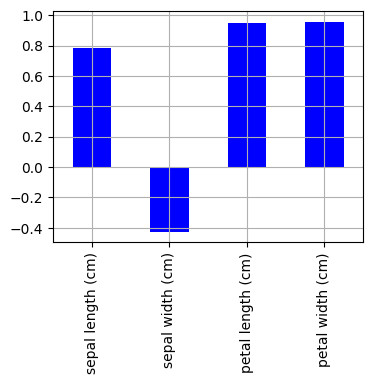

In [8]:
features = df_iris.drop('Target', axis=1)
corr_with_target=features.corrwith(df_iris['Target']).plot(kind='bar', grid=True, figsize=(4,3), color='blue')


D'aprés le plot, on voit que les deux features les plus importantes sont Petal length et Petal width.

In [9]:
# normalize dataset
iris_data=df_iris.drop('Target',axis = 1)
iris_data.head()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_data)
iris_norm=scaler.transform(iris_data)

## 2. Dataset Diabetes
Le dataset contient 768 observations telle que chaque observation possède 8 features.
On veut prédire si une personne est atteinte du diabete ou non.

In [10]:
data = pd.read_csv("diabetes.txt")
data.to_csv('diabetes.csv',index=False)
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df_diabetes = pd.read_csv('diabetes.csv', names=names)
print(df_diabetes.head())
print(df_diabetes.info())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


#### vérifier l'existance des valeurs NaN

In [11]:
df_diabetes.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

aucune valeur donc on ne faut aucun prétraitement sur le dataset

<Figure size 1000x1000 with 0 Axes>

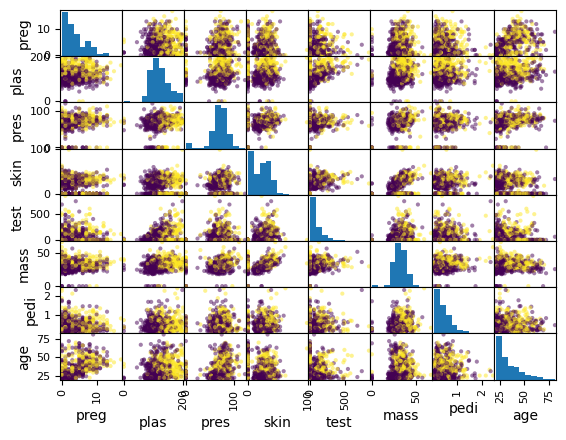

<Figure size 1000x1000 with 0 Axes>

In [12]:
# visualiser la matrice de corrélation entre les features
diabetes_data=df_diabetes.drop('class',axis=1)
pd.plotting.scatter_matrix(diabetes_data, c=df_diabetes['class'])
plt.figure(figsize=(10, 10))

La matrice de correlation permet de voir le degré de corrélation entre les features du dataset Diabetes.

In [13]:
features = df_diabetes.drop('class', axis=1)
cor = features.corr()
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.figure(figsize=(8,3))

NameError: name 'sns' is not defined

On calcule et on visualise la corrélation entre chaque feature et le Target.  On assigne un score de relevance de chaque feature.

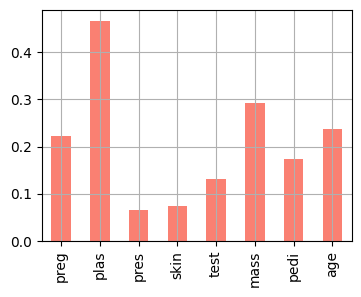

In [14]:
corr_with_target=features.corrwith(df_diabetes['class']).plot(kind='bar', grid=True, figsize=(4,3), color='salmon')

In [ ]:
D'après le plot, les features preg, plas, mass, pedi et age sont les plus importantes.

In [ ]:
## 3. Travail demandé

Proposer une implémentation de l'algorithme génétique pour extraire effectuer une sélection des caractéristiques (wrapper méthod) pour chacun des datasets.

Instructions
1- Effectuer une classification (MLP) du dataset avec toutes les features. soit acc_original l'accuracy avec toutes les features.
2- Choisir le codage du chromosome
3- initialiser une population de N chromosomes
4- Evaluer la population (fitness=accuracy du classificateur MLP)
5- Génération de la nouvelle population
6- si critère d'arrêt satifait aller à 7 sinon revenir vers 4
7- afficher le meilleur chromosome ainsi que sa fitness.

Est ce que la fitness (accuracy du MLP) est suffisante pour trouver le sous_ensemble optimal de features à votre avis?

I. Algorithm Genétique pour la sélection des caractéristiques du dataset Iris

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1-Classification du dataset Iris avec toutes les features :

Classification avec MLP :

In [15]:
# Classification avec MLP
x = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
acc_original = accuracy_score(y_test, y_pred)
print("Accuracy with all features : ", acc_original)

Accuracy with all features :  1.0


2-Codage du chromosome : Voici un exemple de codage du chromosome où chaque chromosome est représenté par une chaîne de bits binaires de longueur n_features (= 4 dans ce cas) :

1 signifie que la feature est incluse dans le sous-ensemble de features
0 signifie que la feature n'est pas incluse dans le sous-ensemble de features
Exemple de chromosome : [1, 1, 0, 1]

3-Initialisation de la population :

Créer une population initiale de N chromosomes en générant des chaînes de bits aléatoires de longueur n_features
Générer une population aléatoire de chromosomes

In [16]:
N = 20  # Nombre de chromosomes
population = np.random.randint(2, size=(N, n_features))

NameError: name 'n_features' is not defined

4-Évaluation de la population :

Fitness = score d'accuracy du classificateur MLP avec le sous-ensemble de features du chromosome
Itérer sur chaque chromosome de la population et calculer sa fitness

In [17]:
def eval_population(population, X_train, X_test, y_train, y_test):
    fitness = np.zeros(population.shape[0])
    for i, chrom in enumerate(population):
        mask = chrom > 0.5
        subset_X_train = X_train[:, mask]
        subset_X_test = X_test[:, mask]
        mlp = MLPClassifier(max_iter=1000)
        mlp.fit(subset_X_train, y_train)
        y_pred = mlp.predict(subset_X_test)
        fitness[i] = accuracy_score(y_test, y_pred)
    return fitness

fitness = eval_population(population, X_train, X_test, y_train, y_test)

NameError: name 'population' is not defined

5-Génération de la nouvelle population :

Sélection
Croisement
Mutation
Remplacer l'ancienne population par la nouvelle population
Réitérer les étapes 4 et 5 jusqu'à atteindre le nombre maximum de générations
On peut initialiser le nombre de génération à 100, par exemple

In [18]:
n_generations = 100
max_generations = n_generations
generation = 0
while (generation < max_generations):
    # Sélection
    ...
    # Croisement
    ...
    # Mutation
    ...
    # Remplacer l'ancienne population par la nouvelle population
    population = new_population
    # Evaluation de la nouvelle population
    fitness = eval_population(population, X_train, X_test, y_train, y_test)
    # Augmenter le numéro de génération
    generation += 1

NameError: name 'new_population' is not defined

6-Affichage du meilleur chromosome et de sa fitness


In [19]:
best_chrom = population[fitness.argmax()]
best_accuracy = fitness.max()
print("Best chromosome : ", best_chrom)
print("Best accuracy : ", best_accuracy)

NameError: name 'population' is not defined